In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [4]:
!nvidia-smi

Wed Oct 16 11:13:32 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.116                Driver Version: 390.116                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   54C    P0    71W / 250W |    228MiB / 11177MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
torch.cuda.set_device(0)

In [6]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-hindi/language-model


In [7]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-hindi/language-model')

In [15]:
# from inltk.tokenizer import HindiTokenizer

In [16]:
# HindiTokenizer

In [10]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-hindi/language-model')

In [11]:
class HindiTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/hindi_lm_large.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [12]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/hindi_lm_large.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [13]:
len(itos)

30000

In [14]:
itos[:20]

['<unk>',
 '<s>',
 '</s>',
 '▁के',
 '।',
 '▁में',
 '▁है',
 ',',
 '▁की',
 '▁',
 '▁और',
 '▁से',
 '▁का',
 '▁को',
 '▁हैं',
 '▁एक',
 '▁पर',
 '.',
 '-',
 '▁ने']

In [15]:
# 30,000 is the vocab size that we chose in sentencepiece
hindi_vocab = Vocab(itos)

In [16]:
tokenizer = Tokenizer(tok_func=HindiTokenizer, lang='hi')

In [17]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [18]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-hindi/language-model')

In [19]:
data_lm = TextLMDataBunch.from_folder(path=path/'hindi_transformer', tokenizer=tokenizer, vocab=hindi_vocab)

In [20]:
data_lm.batch_size

64

In [21]:
data_lm.save()

In [22]:
data_lm.show_batch()

idx,text
0,"▁जे स्टन ▁जेम्स ▁बॉण्ड ▁1953 ▁में ▁अंग्रेज़ ▁लेखक ▁इयान ▁फ़्लेम िंग ▁द्वारा ▁रचित ▁एक ▁काल्पनिक ▁पात्र ▁है । ▁007 ▁के ▁गुप्त ▁नाम ▁से ▁प्रसिद्ध ▁यह ▁एजेंट ▁फ़्लेम िंग ▁की ▁बारह ▁पुस्तकों ▁व ▁दो ▁लघुकथा ओं ▁में ▁मौजूद ▁है । ▁1964 ▁में ▁फ़्लेम िंग ▁की ▁मृत्यु ▁के ▁पश्चात ▁छः ▁अन्य ▁लेखकों ▁ने ▁बॉण्ड ▁की ▁आधि कृत ▁पुस्तकें ▁लिखी ▁हैं , ▁जिनमें ▁किंग्स ले ▁ऐ मिस , ▁क्रिस्टोफ़र ▁वुड्स , ▁जॉन ▁गार्ड"
1,"▁जो ▁क ल्हण ▁द्वारा ▁12 वीं ▁शताब्दी ▁ई . ▁में ▁लिखा ▁गया ▁था । ▁तब ▁तक ▁यहां ▁पूर्ण ▁हिन्दू ▁राज्य ▁रहा ▁था । यह ▁अशोक ▁महान ▁के ▁साम्राज्य ▁का ▁हिस्सा ▁भी ▁रहा । ▁लगभग ▁तीसरी ▁शताब्दी ▁में ▁अशोक ▁का ▁शासन ▁रहा ▁था । ▁तभी ▁यहां ▁बौद्ध ▁धर्म ▁का ▁आगमन ▁हुआ , ▁जो ▁आगे ▁चलकर ▁कुषाण ों ▁के ▁अधीन ▁सम ृ ध्द ▁हुआ ▁था । उ ज्ज ैन ▁के ▁महाराज ▁विक्रमादित्य"
2,"▁पाकिस्तान ▁शामिल ▁हैं ▁जबकि ▁भारी ▁मात्रा ▁में ▁कैन ोला ▁ऑयल ▁और ▁मील ▁संयुक्त ▁राज्य ▁अमेरिका ▁जाता ▁है ▁और ▁इसकी ▁छोटी ▁मात्रा एं ▁मैक्सिको , ▁चीन ▁और ▁यूरोप ▁में ▁भेज ▁दी ▁जाती ▁हैं । ▁वर्ष ▁2002 - 2003 ▁के ▁मौसम ▁में ▁दुनिया ▁भर ▁में ▁लगभग ▁14 ▁मिलियन ▁मैट्रिक ▁टन ▁रे प सीड ▁ऑयल ▁का ▁उत्पादन ▁हुआ ▁था । ▁कैन ोला ▁को ▁पारंपरिक ▁पौध ▁प्रजनन ▁के ▁जरिये ▁रे प सीड ▁से ▁विकसित"
3,"▁फिल्मों ▁में ▁दिखी ं । ▁पहले ▁अभिषेक ▁कपूर ▁की ▁फि तूर ▁में ▁जो ▁चार्ल्स ▁डिकेंस ▁के ▁उपन्यास ▁ग्रेट ▁एक्स्प ेक्ट ै शन ▁पर ▁आधारित ▁थी । ▁फिल्म ▁में ▁आदित्य ▁रॉय ▁कपूर ▁और ▁तब ु ▁भी ▁थे । ▁बाद ▁में ▁बार ▁बार ▁देखो ▁में ▁वह ▁सिद्धार्थ ▁मल्होत्रा ▁के ▁साथ ▁नज़र ▁आई । ▁दोनों ▁ही ▁फिल्म ▁सफल ▁नहीं ▁रही । ▁हिन्दुस्तान ▁के ▁विशाल ▁ठाकुर ▁ने ▁लिखा : ▁"" बार ▁बार ▁देखो ▁में"
4,"▁नहीं ▁आते ▁हैं , ▁जबकि ▁मु वत् ता ▁के ▁सभी ▁हदीस ▁अन्य ▁सही ह ▁किताबों ▁में ▁शामिल ▁हैं । ▁सुन्नी ▁मुस्लिम ▁छह ▁प्रमुख ▁हदीस ▁संग्रह ों ▁को ▁उनके ▁सबसे ▁महत्वपूर्ण ▁मानते ▁हैं , ▁हालांकि ▁प्रामाणिकता ▁का ▁क्रम ▁मज़ ह ब ों ▁के ▁बीच ▁भिन्न ▁होता ▁है ▁इब्न ▁हज र ▁के ▁अनुसार , ▁पहले ▁दो , ▁जिसे ▁आमतौर ▁पर ▁दो ▁सह हि ह ▁के ▁रूप ▁में ▁जाना ▁जाता ▁है , ▁उनकी"


In [23]:
??language_model_learner

In [24]:
len(data_lm.vocab.itos)

30000

In [25]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False)

In [26]:
gc.collect()

1604

In [27]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(30000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(30000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=30000, bias=True)
    (output_dp): RNNDropout()
  )
)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


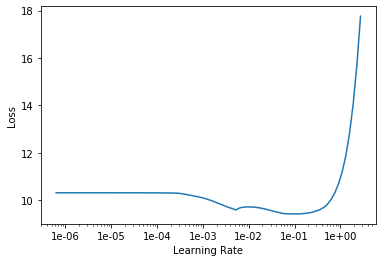

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(20, 1e-3, moms=(0.8,0.7), callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,5.751442,5.643702,0.205336,33:50
1,4.817427,4.793048,0.266742,33:58
2,4.612603,4.395641,0.295616,34:04
3,4.422366,4.196748,0.311338,34:08
4,4.239987,4.065018,0.322284,34:08
5,4.206244,3.981103,0.330692,34:12
6,4.113741,3.911579,0.337195,34:12
7,4.014261,3.851094,0.343927,34:11
8,4.032167,3.800962,0.349590,34:12
9,3.955506,3.765572,0.354403,34:12


Better model found at epoch 0 with accuracy value: 0.205336332321167.
Better model found at epoch 1 with accuracy value: 0.2667420506477356.
Better model found at epoch 2 with accuracy value: 0.2956162393093109.
Better model found at epoch 3 with accuracy value: 0.3113378584384918.
Better model found at epoch 4 with accuracy value: 0.3222842514514923.
Better model found at epoch 5 with accuracy value: 0.33069172501564026.
Better model found at epoch 6 with accuracy value: 0.3371947109699249.
Better model found at epoch 7 with accuracy value: 0.3439274728298187.
Better model found at epoch 8 with accuracy value: 0.3495900630950928.
Better model found at epoch 9 with accuracy value: 0.3544030785560608.
Better model found at epoch 10 with accuracy value: 0.36013102531433105.
Better model found at epoch 11 with accuracy value: 0.3652926981449127.
Better model found at epoch 12 with accuracy value: 0.3690016567707062.
Better model found at epoch 13 with accuracy value: 0.3737213909626007.
B

In [31]:
TEXT = "जिसके लिये उन्हें "
N_WORDS = 40
N_SENTENCES = 2

In [32]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

जिसके लिये उन्हें  ▁all ▁भ्रम ▁तो ▁एम्पायर ्स ▁को ▁बनाने ▁में ▁बचा ना ▁होगा ▁लेकिन ▁इसके ▁लिए ▁उन्हें ▁बादशाह ▁के ▁खिलाफ ▁ऐसी ▁शिकायत ▁सुन नी ▁चाहिये । ▁ऐसी ▁प्रवृति ▁नहीं ▁है ▁कि ▁प्रसिद्द ▁व्यक्तियों ▁की ▁तरह ▁काम ▁करने ▁के ▁लिए ▁बाहर ▁की ▁ओर
जिसके लिये उन्हें  ▁सर्वश्रेष्ठ ▁सहायक ▁अभिनेत्री ▁के ▁लिये ▁नोबेल ▁पुरस्कार ▁प्राप्त ▁हुआ ▁है , ▁उन्होंने ▁उन्हें ▁सर्वश्रेष्ठ ▁गीतकार ▁के ▁लिए ▁' का उ नन्दन ▁फिल्म ▁पुरस्कार ' ▁दिया ▁था । ▁उन्होंने ▁एक ▁लाख ▁से ▁अधिक ▁साधनों ▁से ▁बैठकर ▁ही ▁बतौर ▁अभिनेता ▁की ▁कहानी


In [33]:
np.exp(3.528268)

34.064916056257296

In [34]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [35]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-hindi/language-model')

In [36]:
# learn = load_learner(path / 'HindiDataset')

In [37]:
encoder = get_model(learn.model)[0]

In [38]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([30000, 400])

In [39]:
embeddings = encoder.state_dict()['encoder.weight']

In [40]:
embeddings = np.array(embeddings)

In [41]:
embeddings[0].shape

(400,)

In [42]:
df = pd.DataFrame(embeddings)

In [43]:
df.shape

(30000, 400)

In [44]:
df.to_csv('ulmfit_large_embeddings.tsv', sep='\t', index=False, header=False)

In [45]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.070260,0.161722,-0.283896,0.292114,-0.033296,-0.138606,0.008623,0.384469,-0.056585,-0.417674,...,-0.013075,0.186685,0.006372,-0.027651,-0.525675,-0.067528,-0.188427,1.055574,-0.360146,-0.150507
1,0.003990,0.034629,-0.406700,0.121944,-0.019929,0.018309,0.058361,0.000014,0.021154,0.013913,...,0.035047,0.027207,0.079666,0.067225,0.101667,-0.001406,-0.060258,0.000648,-0.029308,-0.001614
2,0.003257,0.053062,-0.406985,0.125515,-0.012183,0.019895,0.060197,0.005950,0.025459,0.019870,...,0.030035,0.020803,0.080144,0.057581,0.094612,0.010723,-0.059093,-0.004867,-0.027049,-0.000550
3,0.158901,0.116016,-0.231982,-0.141738,-0.582064,-0.121010,0.038129,0.036728,0.706286,0.113444,...,0.026163,0.061985,0.072041,0.055279,0.368510,-0.168286,-0.013608,0.010262,0.433321,-0.062238
4,0.515394,0.150388,-0.560811,-0.217824,-0.088485,0.243484,0.038639,0.285578,0.639499,-0.078303,...,-0.141696,0.485272,-0.227886,0.123881,0.782569,0.233689,-0.178229,-0.279273,-0.487784,0.055523


In [46]:
df.shape

(30000, 400)

In [47]:
len(itos)

30000

In [48]:
df2 = pd.DataFrame(itos)

In [49]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,▁के
4,।


In [50]:
df2.shape

(30000, 1)

In [51]:
df2.to_csv('ulmfit_large_embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [52]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 3.9896e-03,  3.4629e-02, -4.0670e-01,  1.2194e-01, -1.9929e-02,
         1.8309e-02,  5.8361e-02,  1.4350e-05,  2.1154e-02,  1.3913e-02,
        -4.1637e-02,  3.5261e-02,  2.2660e-02,  4.5717e-03, -2.7113e-02,
        -6.5313e-02, -1.1359e-03, -9.3003e-02, -1.2248e-02, -1.6794e-02,
         2.7482e-02, -1.4375e-02,  4.3184e-02, -4.9501e-02,  7.8045e-03,
         1.9203e-01, -9.0404e-02,  7.9326e-03,  9.6202e-03,  2.8788e-02,
         1.9584e-02,  7.5046e-02, -1.9784e-03, -4.2908e-02,  4.9432e-03,
        -6.1185e-02, -3.6334e-02,  3.4995e-02, -3.8668e-02,  4.6059e-02,
        -6.2501e-02,  2.9141e-02, -1.1699e-01, -3.2993e-02, -1.2340e-01,
        -5.9029e-03,  6.7185e-02, -3.7538e-02,  5.7789e-02, -4.2478e-02,
         1.0205e-02,  8.6885e-02, -5.2492e-04,  4.3381e-02, -2.5761e-02,
         2.6653e-02, -6.8218e-02, -1.6502e-02,  8.1296e-03, -1.9546e-02,
        -1.0692e-01,  8.3087e-02,  6.1522e-02,  1.0296e-02,  2.5809e-02,
         3.5692e-02,  3.6327e-02,  6.2493e-02,  1.5